
## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls. 
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data. 
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format. 

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
from citipy import citipy
import os as os
import matplotlib.pyplot as plt
import csv as csv

# Google API Key
from config import api_key

In [2]:
# randomly generate a list of lats and longs
# numpy.random.uniform(low=0.0, high=1.0, size=None)
lat = np.random.uniform(low=-90.00, high=90.00, size=600)
lon = np.random.uniform(low=-180.00, high=180.00, size=600)

In [3]:
latlong = zip(lat, lon)

In [4]:
# Use citipy to generate the a list of the closest cities to your random coordinates. 
cities = []
for c in latlong:
    cities.append(citipy.nearest_city(c[0], c[1]))


In [5]:
city_name=[]
for city in cities:
    name = city.city_name
    city_name.append(name)

In [6]:
# Use Openweather api to get the weather data needed from those cities.
url = "http://api.openweathermap.org/data/2.5/weather?"
temps = []
humid = []
clouds = []
winds = []
lats = []
lons = []
names = []

# Build query URL
for city in city_name:
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
    response = requests.get(query_url)
    if response.status_code == 200:
        response = response.json()
        temps.append(response["main"]["temp"])
        humid.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        winds.append(response["wind"]["speed"])
        lats.append(response["coord"]["lat"])
        lons.append(response["coord"]["lon"])
        names.append(response["name"])

In [10]:
weather = pd.DataFrame({"City": names,
                        "Temperature (F)": temps,
                        "Humidity (%)": humid,
                        "Cloud Coverage (%)": clouds,
                        "Wind Speed (mph)": winds,
                        "Latitude": lats, 
                        "Longitude": lons
                       })
weather.head()

,City,Cloud Coverage (%),Humidity (%),Latitude,Longitude,Temperature (F),Wind Speed (mph)
0,Punta Arenas,75,93,-53.16,-70.91,44.60,4.70
1,Port Alfred,88,96,-33.59,26.89,65.91,10.74
2,Port Alfred,88,96,-33.59,26.89,65.91,10.74
3,Busselton,76,100,-33.64,115.35,59.52,24.16
4,That Phanom,88,91,16.94,104.73,75.18,5.93


In [11]:
len(weather)

527

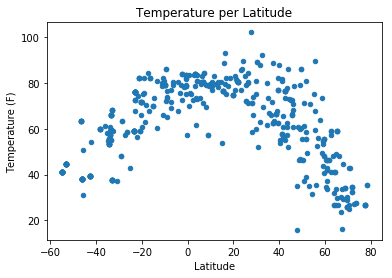

In [12]:
# In [61]: df.plot.scatter(x='a', y='b');

weather.plot.scatter(x="Latitude", y="Temperature (F)", title="Temperature per Latitude")

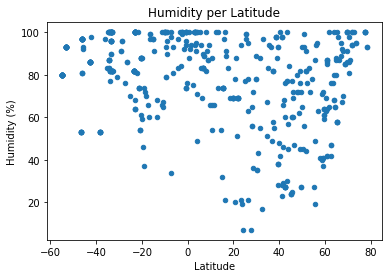

In [13]:
# * Humidity (%) vs. Latitude
weather.plot.scatter(x="Latitude", y="Humidity (%)", title="Humidity per Latitude")

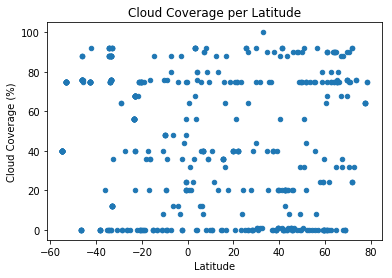

In [14]:
# * Cloudiness (%) vs. Latitude
weather.plot.scatter(x="Latitude", y="Cloud Coverage (%)", title="Cloud Coverage per Latitude")

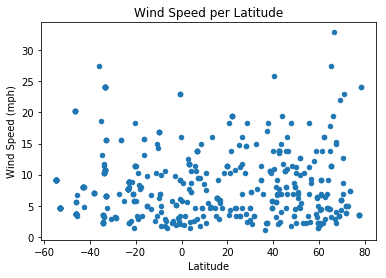

In [15]:
#  Wind Speed (mph) vs. Latitude
weather.plot.scatter(x="Latitude", y="Wind Speed (mph)", title="Wind Speed per Latitude")

### Observation 1: Yes, the temperature does increase significantly between -20 degrees and approx latitude 25 degrees.

### Observation 2: The wind speed seems to drop slightly as well. Lower wind speeds can make a hot climate feel even hotter. This may be based on the time of the year. Since at least latitudes 0 to 90 degrees is currently experiencing spring/early summer.

### Observation 3: The humidity seems to decrease for some areas the further away you get from the equator (0 degrees latitude). Maybe because temperature makes water evaporate? More analysis would be needed to find out why.